In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

## pandasについて

pandasはテーブル的な行列のデータ構造を保持するライブラリ。内部的にnumpyを使っている。
いわゆるRのデータフレームっぽいやつ。

numpyは1つの型で行列をもつ。pandasのデータフレームは列ごとに型をもつ。（列がnumpyの配列）

In [26]:
df = pd.read_csv("data/pandas_sample.csv") #csv読み込み

In [27]:
df #中身の確認

,date,col1,col2,col3
0,20150101,a,1,2
1,20150102,b,3,4
2,20150103,c,5,6
3,20150104,d,7,8
4,20150105,e,9,10


In [28]:
# データフレームは、行の位置を表すインデックスというものをもつ
# インデックスは配列の添字のように順序を表すものではないので注意。DBの表のインデックスのような感じ。
#（行を削除してもインデックスはずれない）
df.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [29]:
#列を確認
df.columns
#(列も実は列方向のインデックス)

Index(['date', 'col1', 'col2', 'col3'], dtype='object')

In [30]:
# 列の取得
df.col2 # = df['col2']

0    1
1    3
2    5
3    7
4    9
Name: col2, dtype: int64

In [31]:
# 列を取得した時の型はSeriesというものになる
type(df['col2'])
# Seriesはインデックスのついた1次元配列みたいな感じ

pandas.core.series.Series

In [32]:
# csvをただ読み込むと行番号がインデックスとして付与されるが
# あとからデータを加工してインデックスを変更することもできる
df.index = pd.to_datetime(df.date, format='%Y%m%d')  #date列を日付パースしてdfのインデックスに使用
df



,date,col1,col2,col3
date,,,,
2015-01-01,20150101,a,1,2
2015-01-02,20150102,b,3,4
2015-01-03,20150103,c,5,6
2015-01-04,20150104,d,7,8
2015-01-05,20150105,e,9,10


In [33]:
# 今回のように加工せずに日付パースするだけの場合には、
# read_csvの引数で指定することで生成時にインデックスを指定できる
# （date列はなくなる）
df = pd.read_csv("data/pandas_sample.csv", index_col='date', parse_dates='date')  #date列を日付インデックスに指定
df

,col1,col2,col3
date,,,
2015-01-01,a,1,2
2015-01-02,b,3,4
2015-01-03,c,5,6
2015-01-04,d,7,8
2015-01-05,e,9,10


In [34]:
# データを指定してデータフレームを作成する例
pd.DataFrame([[1,2,3,4],[5,6,7,8],[9,10,11,12]],
             columns=['A','B','C','D'])

,A,B,C,D
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [35]:
# numpyの配列生成でデータを渡し、インデックスも指定
pd.DataFrame(np.arange(1,13).reshape(3,4), 
             index=["x","y","z"], 
             columns=['A','B','C','D'])

,A,B,C,D
x,1,2,3,4
y,5,6,7,8
z,9,10,11,12


In [36]:
# 各列をSeriesとして渡すパターン(列ごとの型指定)
df2 = pd.DataFrame({
        'A': 1.,
        'B': pd.Timestamp('20130102'),
        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
        'D': np.array([3] * 4, dtype='int32'),
        'F': 'foo'
    })
df2

,A,B,C,D,F
0,1,2013-01-02,1,3,foo
1,1,2013-01-02,1,3,foo
2,1,2013-01-02,1,3,foo
3,1,2013-01-02,1,3,foo


In [37]:
# データフレームの型を確認
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
F            object
dtype: object

## データ抽出 loc, iloc, ixの使い方

- locはindexで指定
- ilocは配列の添字のような順序で指定
- ixは両方可の万能バージョン

### loc

locはインデックスで指定。

データフレームに対して、行インデックス、列インデックスを範囲指定して抽出する

** df.loc[行インデックス範囲, 列インデックス範囲] **

範囲はnumpyのスライシングの表記が使える。
```
df.loc[:,:]  #全行全列
df.loc[3,:]  #インデックス=3の行の全列（順序としての3行目ではないので注意）
```

In [38]:
df

,col1,col2,col3
date,,,
2015-01-01,a,1,2
2015-01-02,b,3,4
2015-01-03,c,5,6
2015-01-04,d,7,8
2015-01-05,e,9,10


In [39]:
df.loc['20150102':'20150104', 'col2':'col3']  #行インデックス=2015/01/02〜2015/01/04のcol2,col3列

,col2,col3
date,,
2015-01-02,3,4
2015-01-03,5,6
2015-01-04,7,8


In [40]:
df.loc[:, 'col2']   #全行のcol2列のみ指定、

date
2015-01-01    1
2015-01-02    3
2015-01-03    5
2015-01-04    7
2015-01-05    9
Name: col2, dtype: int64

In [41]:
# 1列指定だとSeriesになっている
type(df.loc[:, 'col2'])

pandas.core.series.Series

In [42]:
# 1列のデータフレームとして抽出する場合は配列で列指定する
df.loc[:, ['col2']]

,col2
date,
2015-01-01,1
2015-01-02,3
2015-01-03,5
2015-01-04,7
2015-01-05,9


### iloc

ilocは配列の添字のような順序で指定。

データフレームに対して、行番号、列番号を範囲指定して抽出する

** df.iloc[行番号範囲, 列番号範囲] **

範囲はnumpyのスライシングの表記が使える。
```
df.iloc[:,:]  #全行全列
df.iloc[3,:]  #行順序=3の行の全列
```

In [43]:
df.iloc[1:4, :2]  #ilocでは順序（番号）を指定して選択, 1~3行目と、0~1列目

,col1,col2
date,,
2015-01-02,b,3
2015-01-03,c,5
2015-01-04,d,7


### ix

ixはlocとilocのいいとこ取りで、インデックスも指定できるし配列の添字のような順序でも指定できる。

（インデックスが数値の場合にどっちが使われる？）


In [44]:
df.ix['20150102': '20150104', :2]  #行はインデックスで指定。列は番号で指定

,col1,col2
date,,
2015-01-02,b,3
2015-01-03,c,5
2015-01-04,d,7


In [45]:
df.ix[1:4, ['col1','col2']]  #行を行番号で指定、列はインデックスで指定

,col1,col2
date,,
2015-01-02,b,3
2015-01-03,c,5
2015-01-04,d,7


In [46]:
df3 = pd.DataFrame(np.arange(12).reshape(3,4), columns=list("ABCD"), index=[2,3,4])
df3

,A,B,C,D
2,0,1,2,3
3,4,5,6,7
4,8,9,10,11


In [47]:
df3.ix[2:3, :]   # インデックスが整数の場合は、順序は使えないのでその時はilocを使う

,A,B,C,D
2,0,1,2,3
3,4,5,6,7


In [48]:
# 各列をSeriesとして作成
df4 = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] *2,
                   'D' : np.random.rand(12),
                   'E' : np.random.rand(12)})
df4

,A,B,C,D,E
0,one,A,foo,0.255935,0.557975
1,one,B,foo,0.040077,0.856943
2,two,C,foo,0.047652,0.299028
3,three,A,bar,0.941845,0.988929
4,one,B,bar,0.392447,0.523939
5,one,C,bar,0.817383,0.451169
6,two,A,foo,0.745228,0.367598
7,three,B,foo,0.329346,0.085314
8,one,C,foo,0.795456,0.190301
9,one,A,bar,0.806239,0.145640


In [49]:
# ピボットテーブルを作成
# A列をインデックスに、C列の値を列として、D列の値を集計関数sumで集計

pt = pd.pivot_table(df4, values='D', index=['A'], columns=['C'], aggfunc=np.sum)
pt

C,bar,foo
A,,
one,2.016069,1.091468
three,1.096953,0.329346
two,0.033300,0.792880


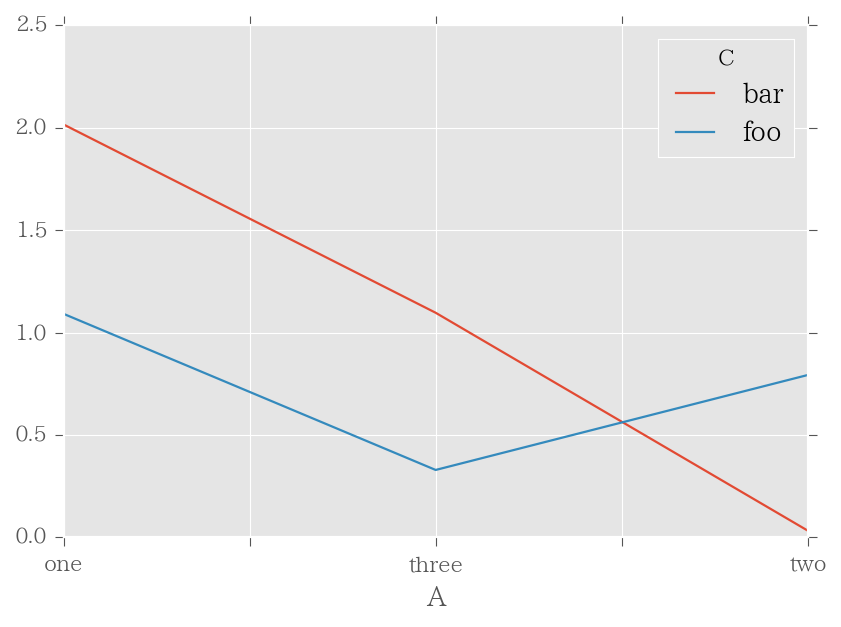

In [50]:
# グラフ描画
pt.plot()